## Логические методы классификации

`Логическая закономерность (rule)` - предикат, удовлетворящий требованиям.

Пусть:  
$\varphi$ - предикат  
$P_c$ - Число объектов класса $c$ в выборке
$p_c(\varphi)$ - Число объектов, которое было успешно определено алгоритмом, т.е. $\varphi(x)=1$  
$N_c(\varphi)$ - Число объектов, отличных от класса $c$  
$n_c(\varphi)$ - Объектов, которые ошибочно определены, т.е. не пренадлежат классу $c$, но предикат $\varphi(x)=1$  

Информативность предиката $\varphi$ тем выше, чем больше $p$ и меньше $n$

---

Для практики рассмотри тестовые данные `iris`. Возьмем два предиката
$$\varphi^1(x)=[x[3]<1.1]$$
$$\varphi^2(x)=[x[1]<3]$$

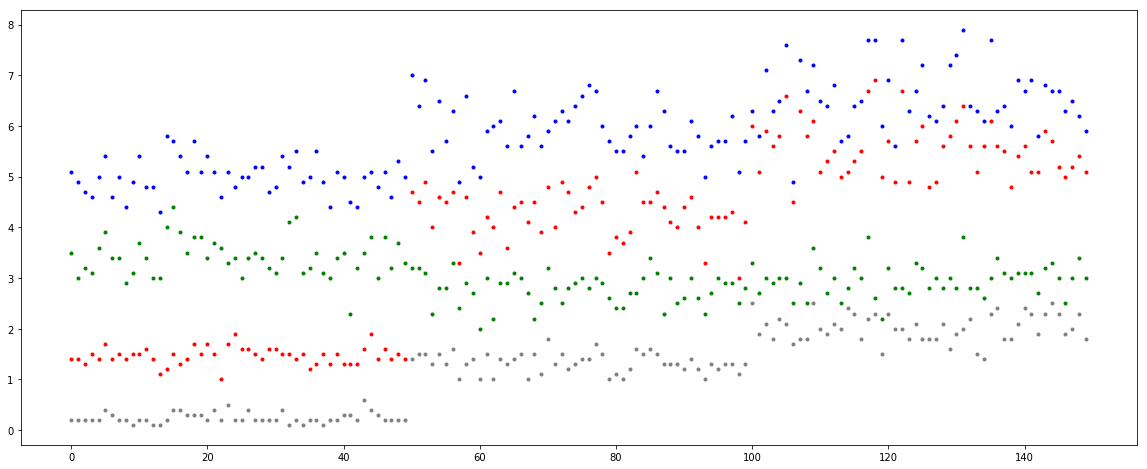

In [5]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np


iris = datasets.load_iris()

f1 = lambda x: x[:, 3] < 1.1
f2 = lambda x: x[:, 1] > 3

classes, counts = np.unique(iris.target, return_counts=True)

P = counts[0]
N = np.sum(counts) - P

X0 = iris.target == 0
Xun0 = iris.target != 0

p1 = np.sum(f1(iris.data[X0]))
n1 = np.sum(f1(iris.data[Xun0]))

p2 = np.sum(f2(iris.data[X0]))
n2 = np.sum(f2(iris.data[Xun0]))

E1 = n1/(p1+n1)
D1 = p1/(N+P)

E2 = n2/(p2+n2)
D2 = p2/(N+P)

 # PLOT
plt.figure(figsize=(20,8))

plt.plot(list(range(iris.data.shape[0])), iris.data[:, 0], ".", color='blue');
plt.plot(list(range(iris.data.shape[0])), iris.data[:, 1], ".", color='green');
plt.plot(list(range(iris.data.shape[0])), iris.data[:, 2], ".", color='red');
plt.plot(list(range(iris.data.shape[0])), iris.data[:, 3], ".", color='grey');
plt.show();

Введём обозначение $E_c$ для доли негативных среди всех выделяемых объектов,
и $D_c$ для доли выделяемых позитивных объектов:
$$E_c(\varphi, X^l)=\frac{n_c(\varphi)}{p_c(\varphi)+n_c(\varphi)}$$
$$D_c(\varphi, X^l)=\frac{p_c(\varphi)}{l}$$

---

В нашем случае:

In [44]:
from IPython.display import Markdown

Markdown("""
$P$ =%6.0f  
$N$ =%6.0f  

$p_1$ =%6.0f  
$n_1$ =%6.0f   
$E_1$ =%6.3f ; $D_1$ =%6.3f  

$p_2$ =%6.0f   
$n_2$ =%6.0f  
$E_2$ =%6.3f ; $D_2$ =%6.3f
""" % (P, 
       N, 
       p1, n1, 
       E1, D1,
       p2, n2,
       E2, D2
       ))


$P$ =    50  
$N$ =   100  

$p_1$ =    50  
$n_1$ =     7   
$E_1$ = 0.123 ; $D_1$ = 0.333  

$p_2$ =    42   
$n_2$ =    25  
$E_2$ = 0.373 ; $D_2$ = 0.280


In [82]:
# from scipy.special import bi
from math import log
from scipy.special import binom

I1 = -log(binom(P, p1)*binom(N, n1)/(binom(P+N, p1+n1)));
I2 = -log(binom(P, p2)*binom(N, n2)/(binom(P+N, p2+n2)));

I_max = -log(binom(P, P)*binom(N, 0)/(binom(P+N, P)));

Предикат определяется как статическая закономерность в случае выполнения теста Фишера.  
Формула коэффициента:
$$I_c = -ln(\frac{-ln(C^p_PC_N^n)}{C_{P+N}^{p+n}})$$

В нашем случае коэффициенты: 

In [83]:
Markdown("""
$I_{max}$=%6.3f  
$I_{nim}$=0

$I_1$=%6.3f   

$I_2$=%6.3f 
""" % (I_max,
       I1,
       I2
       ))


$I_{max}$=92.803  
$I_{nim}$=0

$I_1$=73.410  

$I_2$=26.443 


   
#### Основные вопросы построения логических алгоритмов


#### Идея поиска информативных закономерностей


#### Бинарное решающее дерево
![Spectacle.E25816.png](attachment:Spectacle.E25816.png)